In [9]:
from bs4 import BeautifulSoup
import requests, time
import html5lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
session = requests.Session()
session.headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7)",
}

In [16]:
# crawl xe cu
links = []
for p in range(1, 100):
    url = f"https://oto.com.vn/mua-ban-xe/p{p}"
    html = requests.get(url)
    html.encoding = 'utf-8'
    html = html.text
    soup = BeautifulSoup(html, 'html5lib')
    for i in soup.find_all("div", class_="dev-item-car"):
        href = i.find("a").get("href")
        if href.startswith("/mua-ban-xe"):
            links.append(href)
len(links)

1485

In [21]:
data = []
for link in links:
    try:
        url = "https://oto.com.vn" + link
        car_info = {'URL' : url}
        html = requests.get(url)
        html.encoding = 'utf-8'
        html = html.text
        soup = BeautifulSoup(html, 'html5lib')

        title = soup.find('h1', class_='title-detail').get_text(strip=True)
        car_info['Tên xe'] = title

        price = soup.find('input', {'id': 'hddPrice'}).get('value')
        car_info['Giá'] = price

        numberOfSeat = soup.find('input', {'id': 'numberOfSeat'}).get('value')
        car_info['Số ghế'] = numberOfSeat

        items = soup.select('ul.list-info li')
        for item in items:
            label_tag = item.find('label', class_='label')
            label = label_tag.get_text(strip=True).replace(':', '') if label_tag else ''
            value = item.get_text(strip=True).replace(label_tag.get_text(strip=True), '').strip()
            car_info[label] = value
        data.append(car_info)

    except requests.exceptions.Timeout:
        print(f"Timeout khi lấy: {url}")
    except requests.exceptions.RequestException as e:
        print(f"Lỗi khác ở {url}: {e}")
        
    time.sleep(1)

for car in data:
    print(car)

Lỗi khác ở https://oto.com.vn/mua-ban-xe-hyundai-grand-i10-ha-noi/xe-chat-gia-tot-aidxc23358331: HTTPSConnectionPool(host='oto.com.vn', port=443): Max retries exceeded with url: /mua-ban-xe-hyundai-grand-i10-ha-noi/xe-chat-gia-tot-aidxc23358331 (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1028)')))
{'URL': 'https://oto.com.vn/mua-ban-xe-hyundai-kona-ha-noi/len-doi-can-ban-aidxc23373395', 'Tên xe': 'Hyundai Kona 2.0 AT Đặc biệt 2019', 'Giá': '450000000', 'Số ghế': '5', 'Năm SX': '2019', 'Nhiên liệu': 'Máy xăng', 'Kiểu dáng': 'SUV', 'Tình trạng': 'Xe cũ', 'Km đã đi': '80.000 km', 'Hộp số': 'Số tự động', 'Xuất xứ': 'Trong nước', 'Tỉnh thành': 'Nam Từ Liêm - Hà Nội'}
{'URL': 'https://oto.com.vn/mua-ban-xe-ford-everest-ha-noi/may-nguyen-ban-cua-nha-san-xuat-aidxc23368554', 'Tên xe': 'Ford Everest Titanium 2.0 AT 4x2 2023', 'Giá': '1225000000', 'Số ghế': '7', 'Năm SX': '2023', 'Nhiên liệu': 'Máy dầu', 'Kiểu dáng': 'SUV'

In [23]:
len(data)

1484

In [24]:
df = pd.DataFrame(data)
df

,URL,Tên xe,Giá,Số ghế,Năm SX,Nhiên liệu,Kiểu dáng,Tình trạng,Km đã đi,Hộp số,Xuất xứ,Tỉnh thành
0,https://oto.com.vn/mua-ban-xe-hyundai-kona-ha-...,Hyundai Kona 2.0 AT Đặc biệt 2019,450000000,5,2019,Máy xăng,SUV,Xe cũ,80.000 km,Số tự động,Trong nước,Nam Từ Liêm - Hà Nội
1,https://oto.com.vn/mua-ban-xe-ford-everest-ha-...,Ford Everest Titanium 2.0 AT 4x2 2023,1225000000,7,2023,Máy dầu,SUV,Xe cũ,22.000 km,Số tự động,Nhập khẩu,Hoàng Mai - Hà Nội
2,https://oto.com.vn/mua-ban-xe-ford-transit-hcm...,Ford Transit 2022,715000000,16,2022,Máy dầu,Van/Minivan,Xe cũ,40.000 km,Số sàn,Trong nước,Tân Phú - Tp.HCM
3,https://oto.com.vn/mua-ban-xe-mazda-3-ha-noi/s...,Mazda 3 Sedan 1.5L Luxury 2020,499000000,5,2020,Máy xăng,Sedan,Xe cũ,3.200 km,Số tự động,Trong nước,Hoàng Mai - Hà Nội
4,https://oto.com.vn/mua-ban-xe-mitsubishi-xpand...,Mitsubishi Xpander 1.5 MT 2019,420000000,7,2019,Máy xăng,MPV,Xe cũ,76.000 km,Số tự động,Nhập khẩu,Thuận An - Bình Dương
...,...,...,...,...,...,...,...,...,...,...,...,...
1479,https://oto.com.vn/mua-ban-xe-nissan-tiida-hcm...,Nissan Tiida 1.6 2006,165000000,5,2006,Máy xăng,Sedan,Xe cũ,143.200 km,Số tự động,Nhập khẩu,Tân Bình - Tp.HCM
1480,https://oto.com.vn/mua-ban-xe-mazda-3-lam-dong...,Mazda 3 2022,550000000,5,2022,Máy xăng,Sedan,Xe cũ,7.900 km,Số tự động,Nhập khẩu,Lâm Đồng
1481,https://oto.com.vn/mua-ban-xe-porsche-cayenne-...,Porsche Cayenne 3.6 V6 2011,960000000,5,2011,Máy xăng,SUV,Xe cũ,96.000 km,Số tự động,Nhập khẩu,Tp.HCM
1482,https://oto.com.vn/mua-ban-xe-mazda-6-ha-noi/2...,Mazda 6 2.0 AT 2020,580000000,4,2020,Máy xăng,Sedan,Xe cũ,110.000 km,Số tự động,Trong nước,Hà Nội


In [17]:
# crawl xe moi
new_links = []

for p in range(1, 100):
    url = f'https://oto.com.vn/mua-ban-xe-moi/p{p}'
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html5lib')
    for i in soup.find_all("div", class_="dev-item-car"):
        href = i.find("a").get("href")
        if href.startswith("/mua-ban-xe"):
            new_links.append(href)

# for link in new_links:
#     print(link)
len(new_links)


1485

In [ ]:
new_car_data = []

for link in new_links:
    try:
        url = f'https://oto.com.vn' + link

        car_info = {'URL': url}

        html = requests.get(url)
        html.encoding = 'utf-8'
        html = html.text
        soup = BeautifulSoup(html, 'html5lib')

        title = soup.find('h1', class_='title-detail').get_text(strip=True)
        car_info['Tên xe'] = title

        price = soup.find('input', {'id': 'hddPrice'}).get('value')
        car_info['Giá'] = price

        numberOfSeat = soup.find('input', {'id': 'numberOfSeat'}).get('value')
        car_info['Số ghế'] = numberOfSeat

        items = soup.select('ul.list-info li')
        for item in items:
            label_tag = item.find('label', class_='label')
            label = label_tag.get_text(strip=True).replace(':', '') if label_tag else ''
            value = item.get_text(strip=True).replace(label_tag.get_text(strip=True), '').strip()
            car_info[label] = value
        new_car_data.append(car_info)

    except requests.exceptions.Timeout:
        print(f"Timeout khi lấy: {url}")
    except requests.exceptions.RequestException as e:
        print(f"Lỗi khác ở {url}: {e}")
        
    time.sleep(1)

for car in new_car_data:
    print(car)

{'URL': 'https://oto.com.vn/mua-ban-xe-vinfast-vf5-ha-noi/han-3109-tang-2-nam-bao-hiem-than-vo-tru-12-trieu-san-trang-giao-ngay-gia-chi-tu-101-trieu-nhan-xe-giam-gan-44-trieu-chua-kem-qua-aidxm23337021', 'Tên xe': 'VinFast VF5 Plus 2025', 'Giá': '485000000', 'Số ghế': '7', 'Năm SX': '2025', 'Nhiên liệu': 'Điện', 'Kiểu dáng': 'SUV', 'Tình trạng': 'Xe mới', 'Hộp số': 'Số tự động', 'Xuất xứ': 'Trong nước', 'Tỉnh thành': 'Hai Bà Trưng - Hà Nội'}
{'URL': 'https://oto.com.vn/mua-ban-xe-vinfast-vf3-ha-noi/tra-truoc-44-trieu-tra-gop-4-trieu-thang-lai-xe-dien-vi-vu-tang-2-nam-bhvc-aidxm23337013', 'Tên xe': 'VinFast VF 3 2025', 'Giá': '275000000', 'Số ghế': '4', 'Năm SX': '2025', 'Nhiên liệu': 'Điện', 'Kiểu dáng': 'Van/Minivan', 'Tình trạng': 'Xe mới', 'Hộp số': 'Số tự động', 'Xuất xứ': 'Trong nước', 'Tỉnh thành': 'Hai Bà Trưng - Hà Nội'}
{'URL': 'https://oto.com.vn/mua-ban-xe-mercedes-benz-gls-450-hai-phong/mot-vien-duy-nhat-aidxm23345696', 'Tên xe': 'Mercedes-Benz GLS 450 4Matic 2025', 'Giá': 

In [22]:
len(new_car_data)

1485

In [25]:
new_car_df = pd.DataFrame(new_car_data)
new_car_df

,URL,Tên xe,Giá,Số ghế,Năm SX,Nhiên liệu,Kiểu dáng,Tình trạng,Hộp số,Xuất xứ,Tỉnh thành
0,https://oto.com.vn/mua-ban-xe-vinfast-vf5-ha-n...,VinFast VF5 Plus 2025,485000000,7,2025,Điện,SUV,Xe mới,Số tự động,Trong nước,Hai Bà Trưng - Hà Nội
1,https://oto.com.vn/mua-ban-xe-vinfast-vf3-ha-n...,VinFast VF 3 2025,275000000,4,2025,Điện,Van/Minivan,Xe mới,Số tự động,Trong nước,Hai Bà Trưng - Hà Nội
2,https://oto.com.vn/mua-ban-xe-mercedes-benz-gl...,Mercedes-Benz GLS 450 4Matic 2025,5689000000,7,2025,Máy xăng,SUV,Xe mới,Số tự động,Nhập khẩu,Hồng Bàng - Hải Phòng
3,https://oto.com.vn/mua-ban-xe-vinfast-herio-gr...,VinFast Herio Green 2025,419000000,5,2025,Điện,SUV,Xe mới,Số tự động,Trong nước,Long Biên - Hà Nội
4,https://oto.com.vn/mua-ban-xe-vinfast-vf7-ha-n...,VinFast VF7 Plus 2025,861000000,0,2025,Điện,SUV,Xe mới,Số tự động,Trong nước,Hai Bà Trưng - Hà Nội
...,...,...,...,...,...,...,...,...,...,...,...
1480,https://oto.com.vn/mua-ban-xe-mazda-cx-30-hcm/...,Mazda CX-30 2.0L Luxury 2024,639000000,5,2024,Máy xăng,Crossover,Xe mới,Số tự động,Trong nước,Thủ Đức - Tp.HCM
1481,https://oto.com.vn/mua-ban-xe-kia-sportage-hcm...,Kia Sportage 2.0D Signature 2025,910000000,5,2025,Máy dầu,SUV,Xe mới,Số tự động,Trong nước,Thủ Đức - Tp.HCM
1482,https://oto.com.vn/mua-ban-xe-kia-carnival-hcm...,Kia Carnival 2025,1799000000,7,2025,Hybrid,MPV,Xe mới,Số tự động,Trong nước,Thủ Đức - Tp.HCM
1483,https://oto.com.vn/mua-ban-xe-kia-carnival-hcm...,Kia Carnival 2025,1799000000,7,2025,Hybrid,MPV,Xe mới,Số tự động,Trong nước,Thủ Đức - Tp.HCM


In [26]:
data_all = data + new_car_data
all_car_df = pd.DataFrame(data_all)
all_car_df

,URL,Tên xe,Giá,Số ghế,Năm SX,Nhiên liệu,Kiểu dáng,Tình trạng,Km đã đi,Hộp số,Xuất xứ,Tỉnh thành
0,https://oto.com.vn/mua-ban-xe-hyundai-kona-ha-...,Hyundai Kona 2.0 AT Đặc biệt 2019,450000000,5,2019,Máy xăng,SUV,Xe cũ,80.000 km,Số tự động,Trong nước,Nam Từ Liêm - Hà Nội
1,https://oto.com.vn/mua-ban-xe-ford-everest-ha-...,Ford Everest Titanium 2.0 AT 4x2 2023,1225000000,7,2023,Máy dầu,SUV,Xe cũ,22.000 km,Số tự động,Nhập khẩu,Hoàng Mai - Hà Nội
2,https://oto.com.vn/mua-ban-xe-ford-transit-hcm...,Ford Transit 2022,715000000,16,2022,Máy dầu,Van/Minivan,Xe cũ,40.000 km,Số sàn,Trong nước,Tân Phú - Tp.HCM
3,https://oto.com.vn/mua-ban-xe-mazda-3-ha-noi/s...,Mazda 3 Sedan 1.5L Luxury 2020,499000000,5,2020,Máy xăng,Sedan,Xe cũ,3.200 km,Số tự động,Trong nước,Hoàng Mai - Hà Nội
4,https://oto.com.vn/mua-ban-xe-mitsubishi-xpand...,Mitsubishi Xpander 1.5 MT 2019,420000000,7,2019,Máy xăng,MPV,Xe cũ,76.000 km,Số tự động,Nhập khẩu,Thuận An - Bình Dương
...,...,...,...,...,...,...,...,...,...,...,...,...
2964,https://oto.com.vn/mua-ban-xe-mazda-cx-30-hcm/...,Mazda CX-30 2.0L Luxury 2024,639000000,5,2024,Máy xăng,Crossover,Xe mới,NaN,Số tự động,Trong nước,Thủ Đức - Tp.HCM
2965,https://oto.com.vn/mua-ban-xe-kia-sportage-hcm...,Kia Sportage 2.0D Signature 2025,910000000,5,2025,Máy dầu,SUV,Xe mới,NaN,Số tự động,Trong nước,Thủ Đức - Tp.HCM
2966,https://oto.com.vn/mua-ban-xe-kia-carnival-hcm...,Kia Carnival 2025,1799000000,7,2025,Hybrid,MPV,Xe mới,NaN,Số tự động,Trong nước,Thủ Đức - Tp.HCM
2967,https://oto.com.vn/mua-ban-xe-kia-carnival-hcm...,Kia Carnival 2025,1799000000,7,2025,Hybrid,MPV,Xe mới,NaN,Số tự động,Trong nước,Thủ Đức - Tp.HCM


In [27]:
df.to_csv('old_car.csv', index=False, encoding='utf-8-sig')
new_car_df.to_csv('new_car.csv', index=False, encoding='utf-8-sig')
all_car_df.to_csv('car_data.csv', index=False, encoding='utf-8-sig')

In [4]:
tmp = pd.read_csv('car_data.csv')
tmp

,URL,Tên xe,Giá,Số ghế,Năm SX,Nhiên liệu,Kiểu dáng,Tình trạng,Km đã đi,Hộp số,Xuất xứ,Tỉnh thành
0,https://oto.com.vn/mua-ban-xe-hyundai-kona-ha-...,Hyundai Kona 2.0 AT Đặc biệt 2019,450000000,5,2019,Máy xăng,SUV,Xe cũ,80.000 km,Số tự động,Trong nước,Nam Từ Liêm - Hà Nội
1,https://oto.com.vn/mua-ban-xe-ford-everest-ha-...,Ford Everest Titanium 2.0 AT 4x2 2023,1225000000,7,2023,Máy dầu,SUV,Xe cũ,22.000 km,Số tự động,Nhập khẩu,Hoàng Mai - Hà Nội
2,https://oto.com.vn/mua-ban-xe-ford-transit-hcm...,Ford Transit 2022,715000000,16,2022,Máy dầu,Van/Minivan,Xe cũ,40.000 km,Số sàn,Trong nước,Tân Phú - Tp.HCM
3,https://oto.com.vn/mua-ban-xe-mazda-3-ha-noi/s...,Mazda 3 Sedan 1.5L Luxury 2020,499000000,5,2020,Máy xăng,Sedan,Xe cũ,3.200 km,Số tự động,Trong nước,Hoàng Mai - Hà Nội
4,https://oto.com.vn/mua-ban-xe-mitsubishi-xpand...,Mitsubishi Xpander 1.5 MT 2019,420000000,7,2019,Máy xăng,MPV,Xe cũ,76.000 km,Số tự động,Nhập khẩu,Thuận An - Bình Dương
...,...,...,...,...,...,...,...,...,...,...,...,...
2964,https://oto.com.vn/mua-ban-xe-mazda-cx-30-hcm/...,Mazda CX-30 2.0L Luxury 2024,639000000,5,2024,Máy xăng,Crossover,Xe mới,NaN,Số tự động,Trong nước,Thủ Đức - Tp.HCM
2965,https://oto.com.vn/mua-ban-xe-kia-sportage-hcm...,Kia Sportage 2.0D Signature 2025,910000000,5,2025,Máy dầu,SUV,Xe mới,NaN,Số tự động,Trong nước,Thủ Đức - Tp.HCM
2966,https://oto.com.vn/mua-ban-xe-kia-carnival-hcm...,Kia Carnival 2025,1799000000,7,2025,Hybrid,MPV,Xe mới,NaN,Số tự động,Trong nước,Thủ Đức - Tp.HCM
2967,https://oto.com.vn/mua-ban-xe-kia-carnival-hcm...,Kia Carnival 2025,1799000000,7,2025,Hybrid,MPV,Xe mới,NaN,Số tự động,Trong nước,Thủ Đức - Tp.HCM


In [19]:
len(tmp[tmp['Kiểu dáng'] == 'SUV'])

1186

In [5]:
# 3. Làm sạch dữ liệu

# Kiểm tra có bao nhiêu cột không có dữ liệu
tmp.isnull().sum()

URL              0
Tên xe           0
Giá              0
Số ghế           0
Năm SX           0
Nhiên liệu       0
Kiểu dáng      308
Tình trạng       0
Km đã đi      1500
Hộp số           0
Xuất xứ         21
Tỉnh thành       0
dtype: int64

In [ ]:
# Tạo một bản sao để chỉnh sửa
df_cleaned = tmp.copy()

# 1. Sử dụng .str.replace() để loại bỏ các ký tự không phải số
# Chúng ta dùng regex (biểu thức chính quy) r'[. km]' để xóa cả dấu '.' và ' km'
df_cleaned['Km đã đi'] = df_cleaned['Km đã đi'].replace(r'[. km]', '', regex=True)
# df_cleaned['Km đã đi'] = df_cleaned['Km đã đi'].replace(".", "")

# 2. Chuyển cột sang dạng số
# errors='coerce' sẽ biến bất kỳ giá trị nào không thể chuyển (như 'nan' hoặc chuỗi rỗng) thành NaN (Not a Number)
df_cleaned['Km đã đi'] = pd.to_numeric(df_cleaned['Km đã đi'], errors='coerce')

print(df_cleaned[['Tình trạng', 'Km đã đi']].head())

  Tình trạng  Km đã đi
0      Xe cũ   80000.0
1      Xe cũ   22000.0
2      Xe cũ   40000.0
3      Xe cũ    3200.0
4      Xe cũ   76000.0


In [80]:
# Xử lý giá trị NaN

# 1. Tính trung vị (median) của 'Km đã đi' CHỈ cho 'Xe cũ'
# Chúng ta lọc ra các xe cũ và không bị NaN ở cột 'Km đã đi' để tính
median_km_cu = df_cleaned[df_cleaned['Tình trạng'] == 'Xe cũ']['Km đã đi'].median()
print(f"Trung vị 'Km đã đi' của xe cũ là: {median_km_cu}")

# 2. Điền giá trị
# Dùng .loc[<điều kiện hàng>, <tên cột>] = <giá trị>

# Điền 0 cho xe mới bị thiếu
df_cleaned.loc[(df_cleaned['Tình trạng'] == 'Xe mới') & (df_cleaned['Km đã đi'].isnull()), 'Km đã đi'] = 0

# Điền median cho xe cũ bị thiếu
df_cleaned.loc[(df_cleaned['Tình trạng'] == 'Xe cũ') & (df_cleaned['Km đã đi'].isnull()), 'Km đã đi'] = median_km_cu

df_cleaned.isnull().sum()

Trung vị 'Km đã đi' của xe cũ là: 60000.0


URL             0
Tên xe          0
Giá             0
Số ghế          0
Năm SX          0
Nhiên liệu      0
Kiểu dáng     308
Tình trạng      0
Km đã đi        0
Hộp số          0
Xuất xứ        21
Tỉnh thành      0
dtype: int64

In [81]:
# Xử lý giá trị thiếu cho cột Kiểu dáng và Xuất xứ

# Thay thế giá trị thiếu bằng giá trị phổ biến nhất (mode)
# .mode()[0] trả về giá trị phổ biến nhất

mode_XX = df_cleaned['Xuất xứ'].mode()[0]
print(f'Giá trị phổ biến nhất ở cột Xuất xứ là: {mode_XX}')

mode_KD = df_cleaned['Kiểu dáng'].mode()[0]
print(f'Giá trị phổ biến nhất ở cột Kiểu dáng là: {mode_KD}')

Giá trị phổ biến nhất ở cột Xuất xứ là: Trong nước
Giá trị phổ biến nhất ở cột Kiểu dáng là: SUV


In [ ]:
# Lặp qua các cột phân loại có thể bị thiếu
for col in ['Xuất xứ', 'Kiểu dáng']:
    if df_cleaned[col].isnull().any():
         # Kiểm tra xem cột có bị thiếu không

        mode_value = df_cleaned[col].mode()[0]

        # .fillna() để điền vào các giá trị NaN
        df_cleaned[col] = df_cleaned[col].fillna(mode_value)

print('Số cột không có giá trị là:')
print(df_cleaned.isnull().sum())

Số cột không có giá trị là:
URL           0
Tên xe        0
Giá           0
Số ghế        0
Năm SX        0
Nhiên liệu    0
Kiểu dáng     0
Tình trạng    0
Km đã đi      0
Hộp số        0
Xuất xứ       0
Tỉnh thành    0
dtype: int64


In [89]:
# Kiểm tra phòng trường hợp Số ghế = 0 (vô lý)
print(f'Có {len(df_cleaned[df_cleaned['Số ghế'] == 0])} xe có Số ghế = 0')

Có 312 xe có Số ghế = 0


In [90]:
# Cần xử lý các giá trị Số ghế = 0 này bằng việc thay bằng mode
mode_so_ghe = df_cleaned['Số ghế'].mode()[0]
print(f'Giá trị phổ biến nhất ở cột Số ghế là: {mode_so_ghe}')

# Thay chúng vào các cột = 0
df_cleaned.loc[df_cleaned['Số ghế'] == 0, 'Số ghế'] = mode_so_ghe

print(f'Có {len(df_cleaned[df_cleaned['Số ghế'] == 0])} xe có Số ghế = 0')

Giá trị phổ biến nhất ở cột Số ghế là: 5
Có 0 xe có Số ghế = 0


In [91]:
# Đã xử lý toàn bộ dữ liệu
# => Lưu DataFrame đã làm sạch
df_cleaned.to_csv('car_data_cleaned.csv', index=False, encoding='utf-8-sig')

In [6]:
# 4. Phân tích ngoại lai (cho cột 'Giá')
df_cleaned = pd.read_csv('car_data_cleaned.csv')
# Lấy các cột số để phân tích
numeric_cols = ['Giá', 'Số ghế', 'Năm SX', 'Km đã đi']
data_numeric = df_cleaned[numeric_cols]

# Tính Q1 (phân vị 25%) và Q3 (phân vị 75%)
Q1 = data_numeric['Giá'].quantile(0.25)
Q3 = data_numeric['Giá'].quantile(0.75)
IQR = Q3 - Q1 # Interquartile Range

# Xác định ngưỡng
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Ngưỡng ngoại lai trên (cột Giá): {upper_bound}")
print(f"Ngưỡng ngoại lai dưới (cột Giá): {lower_bound}")

# Đếm số lượng ngoại lai
outliers_count = ((data_numeric['Giá'] < lower_bound) | (data_numeric['Giá'] > upper_bound)).sum()
print(f"Phát hiện {outliers_count} ngoại lai trong cột 'Giá'.")
# Chiến lược: Sẽ không xóa, nhưng sẽ ưu tiên dùng RobustScaler ở bước 5

Ngưỡng ngoại lai trên (cột Giá): 2072500000.0
Ngưỡng ngoại lai dưới (cột Giá): -523500000.0
Phát hiện 395 ngoại lai trong cột 'Giá'.


In [ ]:
# 4. Phân tích ngoại lai (cho cột 'Số ghế')

# Tính Q1 (phân vị 25%) và Q3 (phân vị 75%)
Q1 = data_numeric['Số ghế'].quantile(0.25)
Q3 = data_numeric['Số ghế'].quantile(0.75)
IQR = Q3 - Q1 # Interquartile Range

# Xác định ngưỡng
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Ngưỡng ngoại lai trên (cột Số ghế): {upper_bound}")
print(f"Ngưỡng ngoại lai dưới (cột Số ghế): {lower_bound}")

# Đếm số lượng ngoại lai
outliers_count = ((data_numeric['Số ghế'] < lower_bound) | (data_numeric['Số ghế'] > upper_bound)).sum()
print(f"Phát hiện {outliers_count} ngoại lai trong cột 'Số ghế'.")

Ngưỡng ngoại lai trên (cột Số ghế): 5.0
Ngưỡng ngoại lai dưới (cột Số ghế): 5.0
Phát hiện 868 ngoại lai trong cột 'Số ghế'.


In [ ]:
# 4. Phân tích ngoại lai (cho cột 'Km đã đi')

# Tính Q1 (phân vị 25%) và Q3 (phân vị 75%)
Q1 = data_numeric['Km đã đi'].quantile(0.25)
Q3 = data_numeric['Km đã đi'].quantile(0.75)
IQR = Q3 - Q1 # Interquartile Range

# Xác định ngưỡng
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Ngưỡng ngoại lai trên (cột Km đã đi): {upper_bound}")
print(f"Ngưỡng ngoại lai dưới (cột Km đã đi): {lower_bound}")

# Đếm số lượng ngoại lai
outliers_count = ((data_numeric['Km đã đi'] < lower_bound) | (data_numeric['Km đã đi'] > upper_bound)).sum()
print(f"Phát hiện {outliers_count} ngoại lai trong cột 'Km đã đi'.")

Ngưỡng ngoại lai trên (cột Km đã đi): 150000.0
Ngưỡng ngoại lai dưới (cột Km đã đi): -90000.0
Phát hiện 87 ngoại lai trong cột 'Km đã đi'.


In [95]:
# 4. Phân tích ngoại lai (cho cột 'Năm SX')

# Tính Q1 (phân vị 25%) và Q3 (phân vị 75%)
Q1 = data_numeric['Năm SX'].quantile(0.25)
Q3 = data_numeric['Năm SX'].quantile(0.75)
IQR = Q3 - Q1 # Interquartile Range

# Xác định ngưỡng
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Ngưỡng ngoại lai trên (cột Năm SX): {upper_bound}")
print(f"Ngưỡng ngoại lai dưới (cột Năm SX): {lower_bound}")

# Đếm số lượng ngoại lai
outliers_count = ((data_numeric['Năm SX'] < lower_bound) | (data_numeric['Năm SX'] > upper_bound)).sum()
print(f"Phát hiện {outliers_count} ngoại lai trong cột 'Năm SX'.")


Ngưỡng ngoại lai trên (cột Năm SX): 2032.5
Ngưỡng ngoại lai dưới (cột Năm SX): 2012.5
Phát hiện 158 ngoại lai trong cột 'Năm SX'.


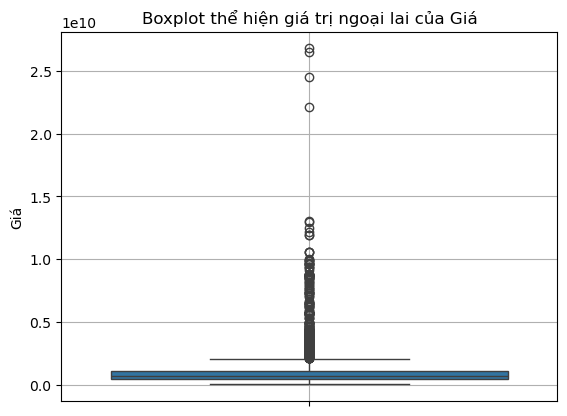

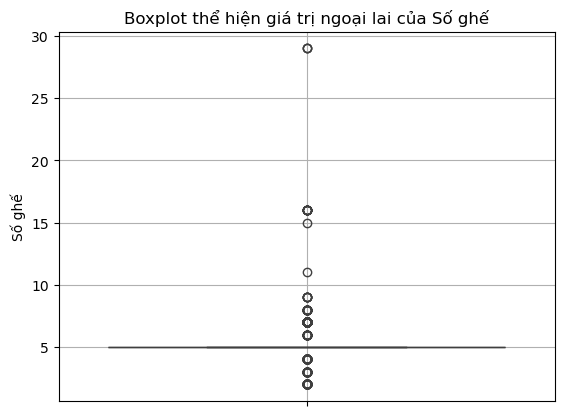

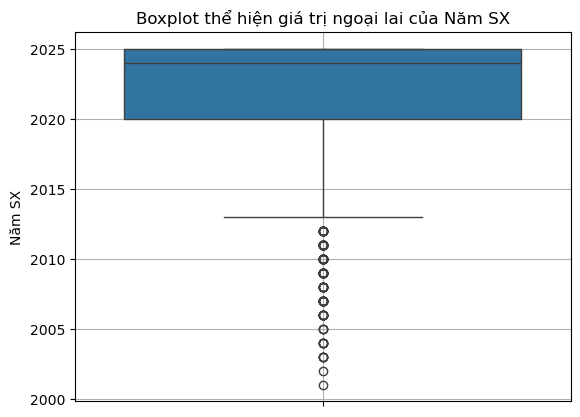

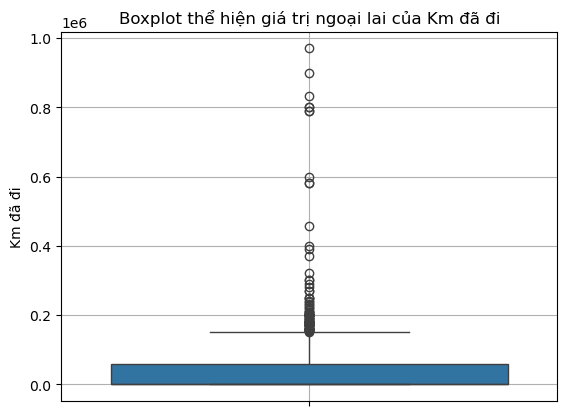

In [ ]:
for col in numeric_cols:
    sns.boxplot(df_cleaned[col])
    plt.title(f"Boxplot thể hiện giá trị ngoại lai của {col}")
    plt.grid()
    plt.show()

In [97]:
## Hàm phát hiện các điểm dữ liệu outliers trong các cột dữ liệu dạng số sử dụng IQR
def detect_outliers(df):
    numeric_cols = df.select_dtypes(include=["float", "int64"]).columns.tolist()
    outlier_indices = set()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        min_whisker = Q1 - 1.5*IQR
        max_whisker = Q3 + 1.5*IQR
        outliers = df[(df[col]<min_whisker) | (df[col]>max_whisker)].index
        outlier_indices.update(outliers)
    return list(outlier_indices)

In [ ]:
# Kích thước df trước khi loại bỏ outliers
df_cleaned.shape

(2969, 12)

In [99]:
# Lấy index outliers
outlier_idx = detect_outliers(df_cleaned)
print(f'Số outliers là: {len(outlier_idx)}')
# # Lọc DataFrame không chứa outliers
# df_no_outliers = df_cleaned.drop(index=outlier_idx)

# # Ta được kích thước DataFrame sau khi loại bỏ outliers:
# df_no_outliers.shape

Số outliers là: 1281


In [13]:
# => Có gần nửa data là outliers
# => Không nên loại bỏ
# => Sử dụng RobustScaler, nó chỉ quan tâm đến Median và IQR, không bị ảnh hưởng bởi các giá trị siêu lớn

# 5. Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 1. Khởi tạo các "Scaler"
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler() # Lựa chọn ưu tiên vì có ngoại lai

# 2. Áp dụng StandardScaler (Mean=0, Std=1)
# .fit_transform() học tham số (mean, std) và biến đổi dữ liệu
df_scaled_std = scaler_standard.fit_transform(data_numeric)
print("\n5 dòng đầu sau khi dùng StandardScaler:")
print(pd.DataFrame(df_scaled_std, columns=numeric_cols).head())

# 3. Áp dụng MinMaxScaler (Range [0, 1])
df_scaled_minmax = scaler_minmax.fit_transform(data_numeric)
print("\n5 dòng đầu sau khi dùng MinMaxScaler:")
print(pd.DataFrame(df_scaled_minmax, columns=numeric_cols).head())

# 4. Áp dụng RobustScaler (Kháng ngoại lai)
# Phương pháp này dùng Median và IQR, ít bị ảnh hưởng bởi giá trị quá lớn/quá nhỏ
df_scaled_robust = scaler_robust.fit_transform(data_numeric)
print("\n5 dòng đầu sau khi dùng RobustScaler (ĐỀ XUẤT):")
print(pd.DataFrame(df_scaled_robust, columns=numeric_cols).head())


5 dòng đầu sau khi dùng StandardScaler:
        Giá    Số ghế    Năm SX  Km đã đi
0 -0.420771 -0.264062 -0.608760  0.677063
1  0.015279  1.081860  0.289219 -0.205140
2 -0.271670  7.138511  0.064725  0.068647
3 -0.393201 -0.264062 -0.384265 -0.491096
4 -0.437650  1.081860 -0.608760  0.616222

5 dòng đầu sau khi dùng MinMaxScaler:
        Giá    Số ghế    Năm SX  Km đã đi
0  0.015880  0.111111  0.750000  0.082474
1  0.044836  0.185185  0.916667  0.022680
2  0.025781  0.518519  0.875000  0.041237
3  0.017710  0.111111  0.791667  0.003299
4  0.014759  0.185185  0.750000  0.078351

5 dòng đầu sau khi dùng RobustScaler (ĐỀ XUẤT):
        Giá  Số ghế  Năm SX  Km đã đi
0 -0.322034     0.0    -1.0  1.333333
1  0.872111     2.0    -0.2  0.366667
2  0.086287    11.0    -0.4  0.666667
3 -0.246533     0.0    -0.8  0.053333
4 -0.368259     2.0    -1.0  1.266667


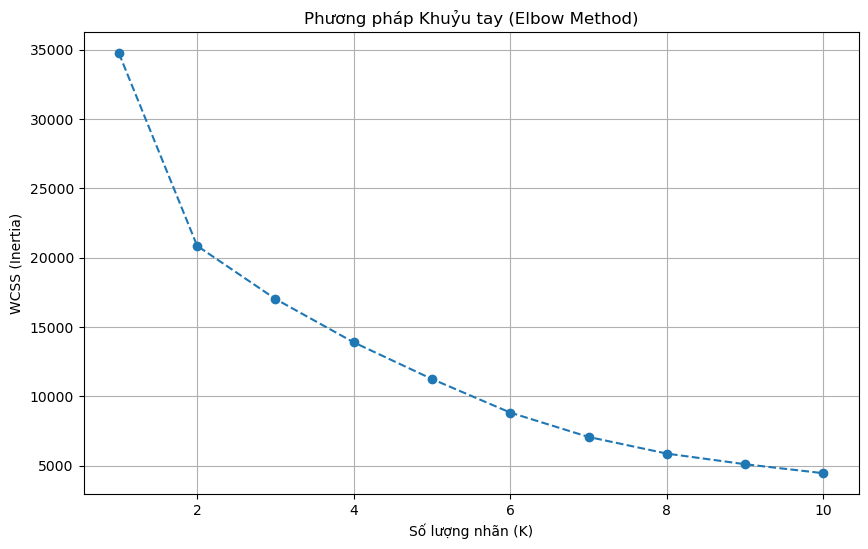

In [14]:
# MinMaxScaler "kẹp" mọi giá trị vào khoảng từ 0 đến 1.
# StandardScaler biến đổi sao cho giá trị trung bình (mean) của cột là 0 và độ lệch chuẩn là 1.
# RobustScaler biến đổi sao cho trung vị (median) là 0 và được co giãn bởi IQR.

# Chương 4: Dùng thuật toán K-means để phân nhãn dữ liệu
from sklearn.cluster import KMeans

# df_scaled_robust là data đã chuẩn hóa bằng RobustScaler
wcss = [] # Sum of squared distances
K_range = range(1, 11) # Thử từ 1 đến 10 nhãn

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_robust)
    wcss.append(kmeans.inertia_) # inertia_ là tổng WCSS

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Số lượng nhãn (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Phương pháp Khuỷu tay (Elbow Method)')
plt.grid(True)

In [15]:
# Từ biểu đồ, ta quyết định chọn cả K=3 và K=4 để so sánh
k_toi_uu = 3

kmeans_final = KMeans(n_clusters=k_toi_uu, random_state=42, n_init=10)
kmeans_final.fit(df_scaled_robust)

# Lấy nhãn của từng dòng dữ liệu
labels = kmeans_final.labels_
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [16]:
# df_cleaned là DataFrame của bạn TRƯỚC KHI chuẩn hóa
df_cleaned['Nhãn'] = labels

# Bây giờ, hãy xem đặc điểm trung bình của từng nhãn
cluster_analysis = df_cleaned.groupby('Nhãn')[['Giá', 'Số ghế', 'Năm SX', 'Km đã đi']].mean()
print(cluster_analysis)

print("\nSố lượng xe trong mỗi nhãn:")
print(df_cleaned['Nhãn'].value_counts())

               Giá    Số ghế       Năm SX      Km đã đi
Nhãn                                                   
0     3.361485e+09  5.427326  2023.590116  10246.345930
1     9.921791e+09  5.164179  2023.313433   7807.940299
2     6.783766e+08  5.393667  2021.417123  39606.157545

Số lượng xe trong mỗi nhãn:
Nhãn
2    2558
0     344
1      67
Name: count, dtype: int64


In [17]:
# Xét trường hợp K=4
k_toi_uu = 4

kmeans_final = KMeans(n_clusters=k_toi_uu, random_state=42, n_init=10)
kmeans_final.fit(df_scaled_robust)

# Lấy nhãn của từng dòng dữ liệu (0, 1, 2, hoặc 3)
labels = kmeans_final.labels_
labels

array([0, 2, 0, ..., 2, 2, 2], dtype=int32)

In [18]:
df_cleaned['Nhãn'] = labels

# Bây giờ, hãy xem đặc điểm trung bình của từng nhãn
cluster_analysis = df_cleaned.groupby('Nhãn')[['Giá', 'Số ghế', 'Năm SX', 'Km đã đi']].mean()
print(cluster_analysis)

# Xem số lượng xe trong mỗi nhãn
print("Số lượng xe trong mỗi nhãn:")
print(df_cleaned['Nhãn'].value_counts())

               Giá    Số ghế       Năm SX       Km đã đi
Nhãn                                                    
0     4.690766e+08  5.802469  2015.534979  110565.757202
1     3.470125e+09  5.448598  2023.498442   10930.660436
2     7.784353e+08  5.229358  2023.776039   11185.167296
3     9.971076e+09  5.166667  2023.287879    7926.242424
Số lượng xe trong mỗi nhãn:
Nhãn
2    1853
0     729
1     321
3      66
Name: count, dtype: int64


In [19]:
# Nhận xét kết quả phân cụm K-means:
# - K=3 (Tốt, nhưng chưa đủ): Đã tốt hơn. Nó chia ra 3 nhóm:

# + Nhãn 2: "Xe phổ thông/cũ" (Giá 678tr, Sx 2021, 39k km)
# + Nhãn 0: "Xe sang" (Giá 3.3 tỷ)
# + Nhãn 1: "Xe siêu sang" (Giá 9.9 tỷ)

# - K=4 (Rất tốt - Lựa chọn tối ưu): Đây là lựa chọn tốt nhất vì nó lấy Nhãn 2 (Xe phổ thông) của K=3 và tách nó ra làm 2 nhóm con có ý nghĩa rõ rệt:

# + Nhóm "Xe cũ/chạy nhiều" (Giá 469tr, SX 2015, 110k km)
# + Nhóm "Xe mới/lướt phổ thông" (Giá 778tr, SX 2023, 11k km)

# => Việc tách được 2 nhóm này cho thấy K=4 cung cấp một cái nhìn chi tiết và giá trị hơn hẳn so với K=3. Biểu đồ khuỷu tay (elbow plot) cũng cho thấy K=4 là một điểm "gãy" hợp lý.

## Kết luận: 4 Phân khúc thị trường xe (Diễn giải K=4)
# Dựa trên kết quả K=4, chúng ta có thể kết luận thị trường xe trong dữ liệu này được chia làm 4 phân khúc chính:

# Phân khúc 1: "Xe Phổ thông Mới / Lướt" (Nhãn 2) 
# Số lượng: 1853 xe (Lớn nhất thị trường)
# Đặc điểm:
# Giá: ~ 778 triệu (tầm trung)
# Năm SX: ~ 2023.7 (Rất mới)
# Km đã đi: ~ 11.000 km (Chạy rất ít, xe lướt)
# Chân dung: Đây là nhóm xe phổ thông (5 chỗ) vừa mới mua, chạy lướt, chiếm phần lớn thị trường.

# Phân khúc 2: "Xe Cũ / Chạy nhiều" (Nhãn 0)
# Số lượng: 729 xe
# Đặc điểm:
# Giá: ~ 469 triệu (Rẻ nhất)
# Năm SX: ~ 2015.5 (Đời sâu nhất)
# Km đã đi: ~ 110.000 km (Chạy nhiều nhất)
# Chân dung: Đây là phân khúc xe cũ, đã sử dụng lâu năm, giá rẻ, thường là xe 5-7 chỗ (trung bình 5.8 ghế).

# Phân khúc 3: "Xe Sang" (Nhãn 1)
# Số lượng: 321 xe
# Đặc điểm:
# Giá: ~ 3.47 tỷ (Cao)
# Năm SX: ~ 2023.5 (Rất mới)
# Km đã đi: ~ 10.900 km (Rất ít)
# Chân dung: Phân khúc xe sang, xe lướt, giá cao.

# Phân khúc 4: "Xe Siêu Sang / Đặc biệt" (Nhãn 3)
# Số lượng: 66 xe (Nhóm nhỏ và đặc biệt)
# Đặc điểm:
# Giá: ~ 9.97 tỷ (Rất cao, nhóm ngoại lai)
# Năm SX: ~ 2023.3 (Rất mới)
# Km đã đi: ~ 7.900 km (Siêu ít)
# Chân dung: Đây là nhóm xe siêu sang, có thể coi là các "ngoại lai" (outliers) về giá. K-means (nhờ RobustScaler) đã tách riêng nhóm này ra rất thành công.

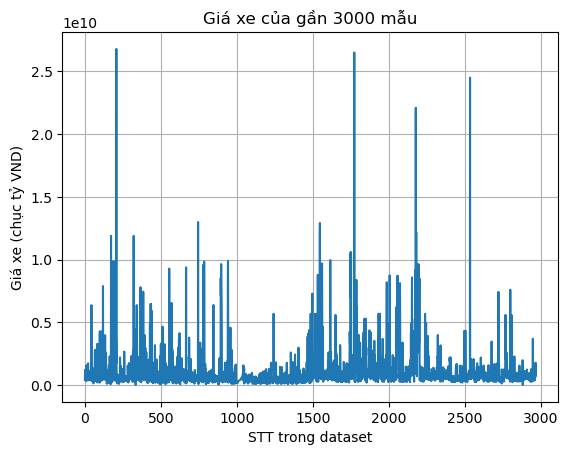

In [20]:
plt.plot(df_cleaned['Giá'])
plt.title('Giá xe của gần 3000 mẫu')
plt.xlabel('STT trong dataset')
plt.ylabel('Giá xe (chục tỷ VND)')
plt.grid()

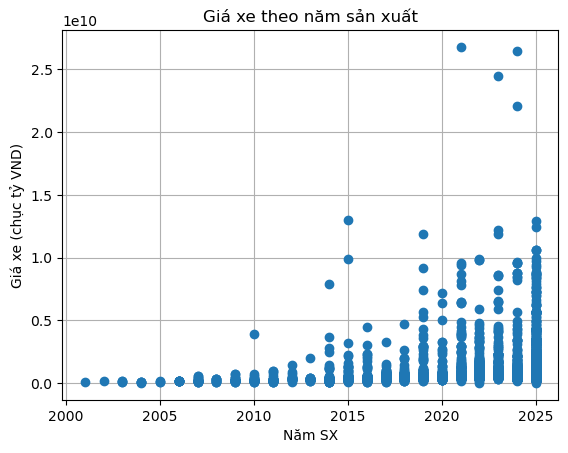

In [21]:
plt.plot(df_cleaned['Năm SX'], df_cleaned['Giá'], 'o')
plt.title('Giá xe theo năm sản xuất')
plt.xlabel('Năm SX')
plt.ylabel('Giá xe (chục tỷ VND)')
plt.grid()

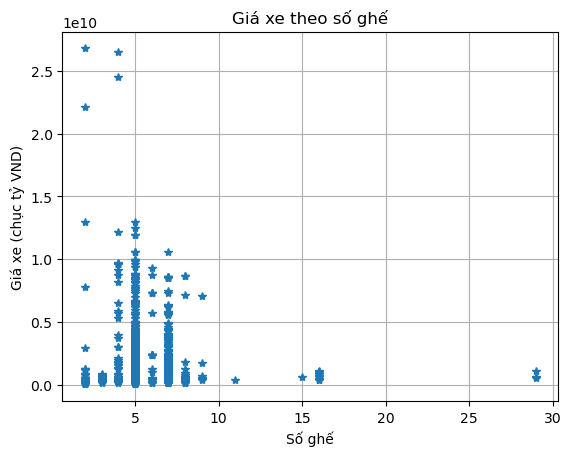

In [22]:
plt.plot(df_cleaned['Số ghế'], df_cleaned['Giá'], '*')
plt.title('Giá xe theo số ghế')
plt.xlabel('Số ghế')
plt.ylabel('Giá xe (chục tỷ VND)')
plt.grid()

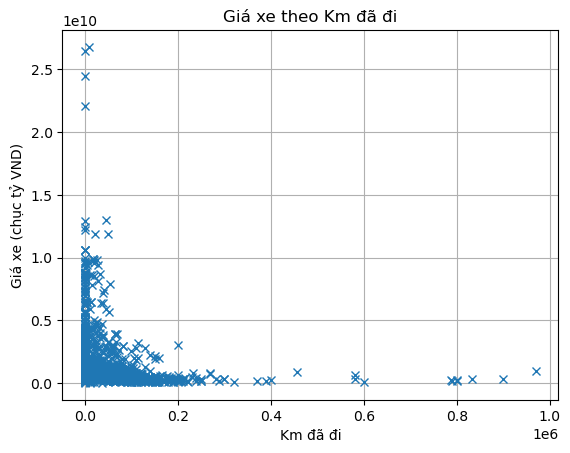

In [23]:
plt.plot(df_cleaned['Km đã đi'], df_cleaned['Giá'], 'x')
plt.title('Giá xe theo Km đã đi')
plt.xlabel('Km đã đi')
plt.ylabel('Giá xe (chục tỷ VND)')
plt.grid()

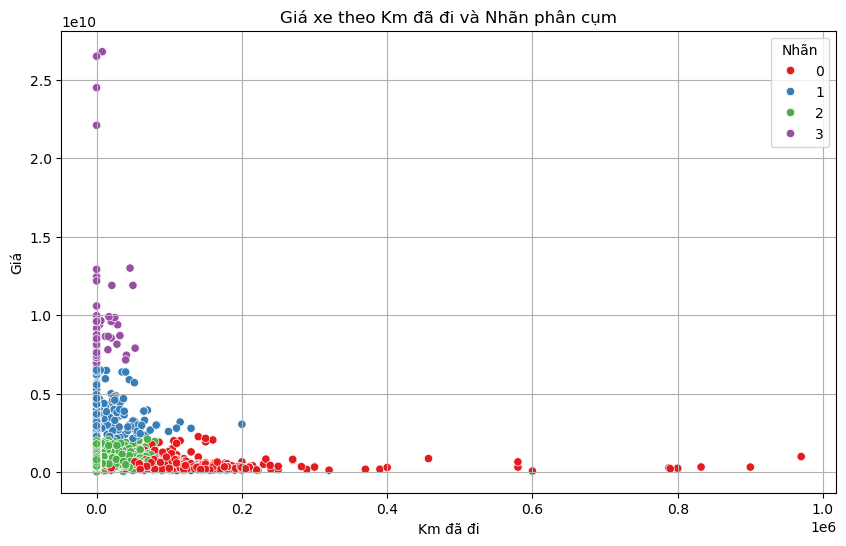

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Km đã đi', y='Giá', hue='Nhãn', data=df_cleaned, palette='Set1')
plt.title('Giá xe theo Km đã đi và Nhãn phân cụm')
plt.grid()
plt.show()

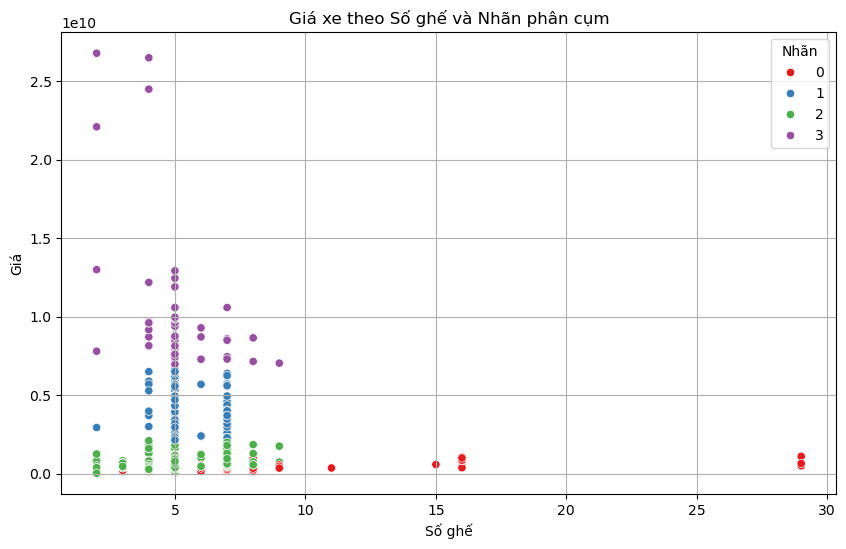

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Số ghế', y='Giá', hue='Nhãn', data=df_cleaned, palette='Set1')
plt.title('Giá xe theo Số ghế và Nhãn phân cụm')
plt.grid()
plt.show()